# Baseline Model (Day 8)

## 1. Load data 

In [2]:
import pandas as pd

url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"

df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. EDA

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check class balance
df['Class'].value_counts(normalize=True)
# We find inbalanced dataset - fraud 0.17%; legit 99.83%

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

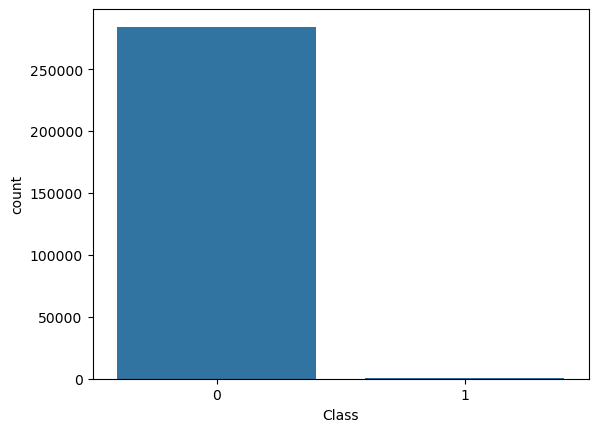

In [8]:
import seaborn as sns

sns.countplot(x="Class", data=df)


## 3. Data Splitting

In [9]:

X = df.drop('Class', axis = 1)
y = df['Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)


## 4. Training model - logistic regression

In [11]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## 5. Model Evaluation

In [12]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9989466661985184

In [13]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[85271    24]
 [   66    82]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

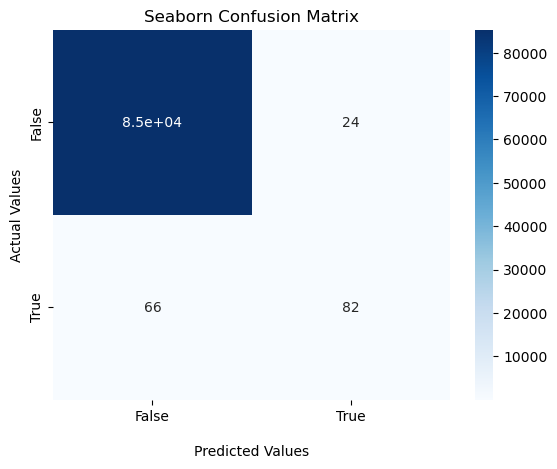

In [14]:
#plot - using heatmap


ax = sns.heatmap(cf_matrix, annot=True, cmap = "Blues")

ax.set_title('Seaborn Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

#Ticket labets - list must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])



In [15]:
dir(ax)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_process_units',
 '_fill_between_x_or_y',
 '_forward_navigation_events',
 '_

# Manual K-Fold Cross-Validation (Day 9)
1. Setup KFold/StratifiedKFold - manual loop across folds
2. Train & evaluate logistic regression per fold - print per fold scores
3. Visualize performance - Boxplot or bar chart of metrics

## 1. Scaling

In [16]:
# X=df.drop('Class', axis=1)
# y = df['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 2. Stratified K-Fold (preserves class ratio)


In [17]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 3. Modeling + Evaluation

In [18]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np
accuracy_list, f1_list, recall_list, precision_list = [], [], [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y), 1): #start counting @1
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(max_iter=1000, solver='lbfgs') #lbfgs - for a large # of variables
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    accuracy_list.append(acc)
    f1_list.append(f1)
    recall_list.append(rec)
    precision_list.append(prec)

    print(f"Fold {fold}: Accuracy={acc:.4f}, F1={f1:.4f}, Recall={rec:.4f}, Precision={prec:.4f}")

#Average scores
print("\nMean scores:")
print(f"Accuracy: {np.mean(accuracy_list):.4f}")
print(f"F1: {np.mean(f1_list):.4f}")
print(f"Recall: {np.mean(recall_list):.4f}")
print(f"Precision: {np.mean(precision_list):.4f}")




Fold 1: Accuracy=0.9991, F1=0.6790, Recall=0.5556, Precision=0.8730
Fold 2: Accuracy=0.9991, F1=0.7191, Recall=0.6465, Precision=0.8101
Fold 3: Accuracy=0.9991, F1=0.6951, Recall=0.5816, Precision=0.8636
Fold 4: Accuracy=0.9993, F1=0.7590, Recall=0.6429, Precision=0.9265
Fold 5: Accuracy=0.9993, F1=0.7586, Recall=0.6735, Precision=0.8684

Mean scores:
Accuracy: 0.9992
F1: 0.7222
Recall: 0.6200
Precision: 0.8683


Recall - How many frauds are actually caught - only 60%, still missing many fraudulent cases
Precision - When it predicts "fraud", it's correct 90% of the time - 90% is good, not too many false alarms, but still could improve recall

## 4. Visualize results

/var/folders/l3/h_6r_m710z53hjgx6m6hp7wh0000gn/T/ipykernel_3111/2724251965.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([accuracy_list, f1_list, recall_list, precision_list],


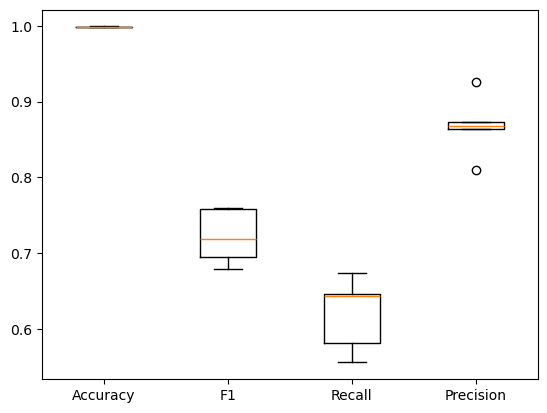

In [19]:
import matplotlib.pyplot as plt
plt.boxplot([accuracy_list, f1_list, recall_list, precision_list],
            labels=['Accuracy', 'F1', 'Recall', 'Precision'])
plt.show()



# GridSearchCV (Day 10)
1. Apply to LogisticRegression
2. Visualize grid scores
3. Log best params

Note: Key Attribute
1. best_params_ - Dictionary of parameter values that gave the best score
2. best_score_ - Mean cross-validation score of the best combination
3. best_estimator_ - The trained model with the best parameters
4. cv_results_ - Detailed results for all parameter combination

## 1. Apply to Logistic Regression

In [20]:
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.01, 0.1, 1, 10], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5, scoring='f1')
grid.fit(X_train, y_train)


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [21]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.696193,0.013197,0.004934,0.000485,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.747126,0.725806,0.446602,0.755906,0.545455,0.644179,0.125321,8
1,0.610079,0.047938,0.004544,0.000195,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.775281,0.746032,0.545455,0.803030,0.644068,0.702773,0.095263,2
2,1.678180,0.292387,0.004891,0.000672,0.10,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.786517,0.755906,0.553571,0.759124,0.615385,0.694100,0.092232,3
3,0.916172,0.061521,0.004505,0.000213,0.10,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.790960,0.755906,0.558559,0.778626,0.644068,0.705624,0.090064,1
4,5.352039,0.809609,0.006583,0.002882,1.00,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.738095,0.755906,0.553571,0.718310,0.650000,0.683176,0.074078,7
5,1.101721,0.089276,0.005058,0.000303,1.00,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.738095,0.755906,0.553571,0.732394,0.650000,0.685993,0.075613,4
6,5.972620,1.088740,0.004789,0.000690,10.00,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.730539,0.750000,0.566372,0.727273,0.650000,0.684837,0.068386,5
7,1.152709,0.051379,0.005494,0.000716,10.00,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.730539,0.750000,0.566372,0.727273,0.650000,0.684837,0.068386,5


## 3. Params log


In [22]:
print("Best parameters: ", grid.best_params_)
print("Best F1: ", grid.best_score_)

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1:  0.7056236546311252


## 2. Visualizing results

In [23]:
results = pd.DataFrame(grid.cv_results_)
results[['param_C', 'param_penalty', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,param_C,param_penalty,mean_test_score
3,0.10,l2,0.705624
1,0.01,l2,0.702773
2,0.10,l1,0.694100
5,1.00,l2,0.685993
6,10.00,l1,0.684837
7,10.00,l2,0.684837
4,1.00,l1,0.683176
0,0.01,l1,0.644179


<Axes: xlabel='param_penalty', ylabel='param_C'>

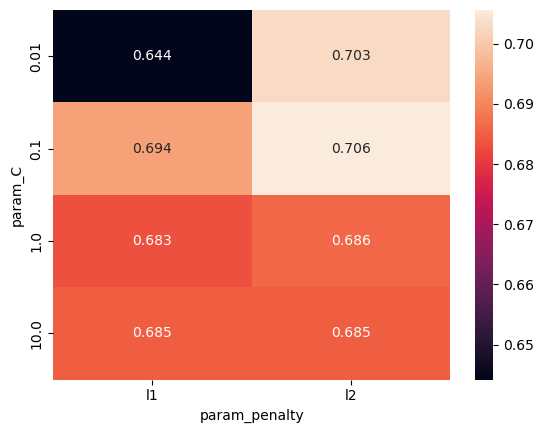

In [24]:
sns.heatmap(results.pivot(index='param_C', columns='param_penalty', values='mean_test_score'),
            annot=True, 
            fmt=".3f")

In [25]:
#Pick C=0.1, penalty='l2'

# Model Comparison (Day 11)
1. Train Models 
    - (LogisticRegression, RandomForestClassifier, SVC)
    - cross_val_score
2. Boxplot Comparison
3. Discuss Results
    - Bias-variance trade-off


## 1. Train Models

In [26]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
'''
models = {
    'Logistic Regression': LogisticRegression(solver="saga", max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
    'LinearSVM': LinearSVC(max_iter=2000)
}
'''
#n_jobs: controls how many CPU cores your model can use in parallel. 
#n_jobs = -1: it tells scikit-learn to use all available CPU cores on your computer. 
#n_jobs = 1 (2): use 1 (2) core


In [ ]:
# Evaluate each using cross_val_score
'''
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

res = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1', n_jobs=-1)
    res[name] = scores
    print(f"{name}: Mean F1 = {np.mean(scores):.3f} ± {np.std(scores):.3f}")
'''


Logistic Regression: Mean F1 = 0.718 ± 0.043
Random Forest: Mean F1 = 0.855 ± 0.015
LinearSVM: Mean F1 = 0.710 ± 0.036


In [34]:
from sklearn.pipeline import make_pipeline
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), 
                                         LogisticRegression(solver='saga', max_iter=2000, n_jobs=-1)),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "LinearSVM": make_pipeline(StandardScaler(), LinearSVC(max_iter=2000, random_state=42))                                        
}

In [35]:
# Evaluate each using cross_val_score

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

res = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1)
    res[name] = scores
    print(f"{name}: Mean F1 = {np.mean(scores):.3f} ± {np.std(scores):.3f}") 

Logistic Regression: Mean F1 = 0.718 ± 0.043
Random Forest: Mean F1 = 0.864 ± 0.016
LinearSVM: Mean F1 = 0.710 ± 0.036


## 2. Boxplot Comparison

/var/folders/l3/h_6r_m710z53hjgx6m6hp7wh0000gn/T/ipykernel_3111/3055927575.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(res.values(), labels=res.keys())


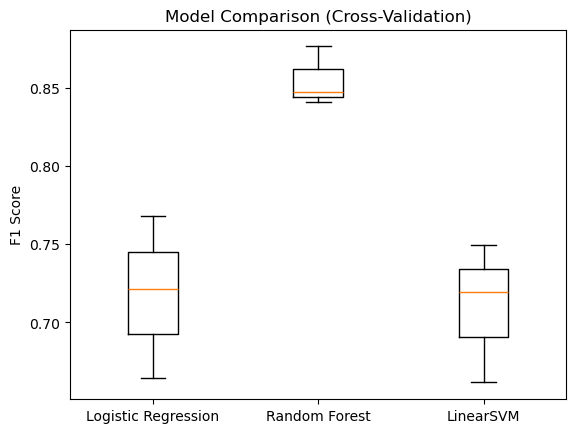

In [29]:
plt.boxplot(res.values(), labels=res.keys())
plt.title("Model Comparison (Cross-Validation)")
plt.ylabel('F1 Score')
plt.show()

“Although Logistic Regression is theoretically a low-variance model, in our dataset it shows larger performance fluctuation across folds due to underfitting. Random Forest, while more complex, benefits from ensemble averaging, producing both higher accuracy and more stable cross-validation scores.”

# ROC & PR Curves - Day 12
1. Implement ROC & PR
    - roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
2. Visualize
    - Plot curves for each model with proper labeling
3. Annotate Results
    - Discuss AUC meaning, threshold effects

## 1. Implement ROC & PR

What is y_score?
Use a continuous score for the positive class (fraud = 1):
If the model has decision_function (e.g., SVC(probability=False), LinearSVC, linear models): use that.
Else use probability: predict_proba(X)[:, 1].
Rule of thumb:
if hasattr(model, "decision_function"):
    y_score = model.decision_function(X)
else:
    y_score = model.predict_proba(X)[:, 1]
Avoid leakage:
Compute curves on a validation set or with out-of-fold (OOF) predictions from StratifiedKFold.


In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    roc_curve, precision_recall_curve,
    roc_auc_score, average_precision_score
)


    
def pick_method(est):
    if hasattr(est, "decision_function"): return "decision_function"
    elif hasattr(est, "predict_proba"): return "predict_proba"
    else: raise ValueError(f"No suitable scoring method for {type(est).__name__}")

## OOF predictions + curves
scores_oof = {}

for name, model in models.items():
    # get OOF scores
    method = pick_method(model)
    if method == "decision_function":
        y_score_oof = cross_val_predict(model, X, y, cv=cv, method="decision_function", n_jobs=-1)
    else:
        y_score_oof = cross_val_predict(model, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

    fpr, tpr, thr_roc = roc_curve(y, y_score_oof)
    prec, rec, thr_pr = precision_recall_curve(y, y_score_oof)

    scores_oof[name] = dict(
        fpr=fpr, tpr=tpr, thr_roc=thr_roc, 
        prec=prec, rec=rec, thr_pr=thr_pr,
        roc_auc = roc_auc_score(y, y_score_oof),
        ap = average_precision_score(y, y_score_oof),
        y_score = y_score_oof
    )


In [38]:
print(scores_oof)

{'Logistic Regression': {'fpr': array([0.        , 0.        , 0.        , ..., 0.99706312, 0.99707015,
       1.        ]), 'tpr': array([0.        , 0.00203252, 0.00406504, ..., 1.        , 1.        ,
       1.        ]), 'thr_roc': array([         inf,  25.69634154,  25.3230116 , ..., -17.22852481,
       -17.23373187, -29.08598181]), 'prec': array([0.00172749, 0.00172749, 0.0017275 , ..., 1.        , 1.        ,
       1.        ]), 'rec': array([1.        , 1.        , 1.        , ..., 0.00406504, 0.00203252,
       0.        ]), 'thr_pr': array([-29.08598181, -27.59546184, -27.50918701, ...,  24.94369055,
        25.3230116 ,  25.69634154]), 'roc_auc': 0.975850006912921, 'ap': 0.7568629064795945, 'y_score': array([-7.33016596, -8.81224626, -7.64110312, ..., -8.46785496,
       -8.04512639, -8.37893131])}, 'Random Forest': {'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.03445122e-06,
       7.

## 2. Visualize

### ROC Plot


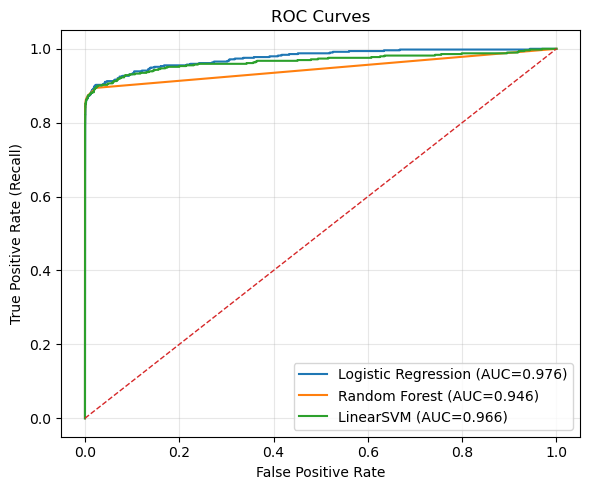

In [42]:
plt.figure(figsize=(6,5))
for name, s in scores_oof.items():  # or scores_oof
    plt.plot(s["fpr"], s["tpr"], label=f"{name} (AUC={s['roc_auc']:.3f})")
plt.plot([0,1],[0,1],"--",linewidth=1)  # chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### PR Plot

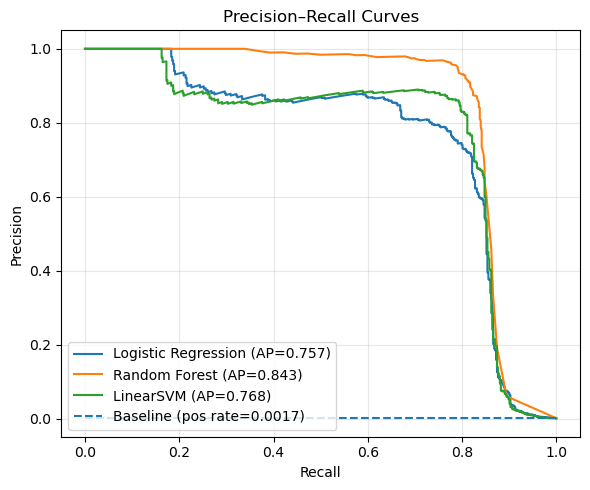

In [43]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(6,5))
for name, s in scores_oof.items():  # or scores_oof
    plt.plot(s["rec"], s["prec"], label=f"{name} (AP={s['ap']:.3f})")
# baseline: positive rate
pos_rate = y_test.mean()  # or y.mean() if OOF
plt.hlines(pos_rate, 0, 1, linestyles="--", label=f"Baseline (pos rate={pos_rate:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Summary:

 ⚖️ **Practical Interpretation**

| Situation | Which Model Wins | Why |
| --- | --- | --- |
| You only care about **ranking / probability calibration** (e.g., feeding scores to a risk system) | **Logistic Regression** | Best ROC-AUC and interpretable probabilities |
| You care about **real-world fraud alerts** (catch as many frauds as possible with minimal false alarms) | **Random Forest** | Best precision–recall curve and highest AP |
| You want a **balance** (robust overall) | **LinearSVM** | Consistent performer between the two extremes |

 ✅ **Final Recommendation for Fraud Detection**

> Random Forest is the best overall model for your specific imbalanced dataset,
because it maintains the highest precision–recall performance (AP = 0.843) —
the most relevant measure for detecting rare fraud cases with few false positives.
> 

However, you could:

- Keep **Logistic Regression** as a lightweight, explainable baseline.
- Tune Random Forest hyperparameters (e.g., `max_depth`, `min_samples_split`, `class_weight='balanced'`) to possibly improve both ROC-AUC *and* PR-AUC further.

## Optional: annotate useful thresholds
Youden’s J (ROC): maximize TPR - FPR

Best F1 (PR): maximize F1 = 2·(P·R)/(P+R) across thresholds.


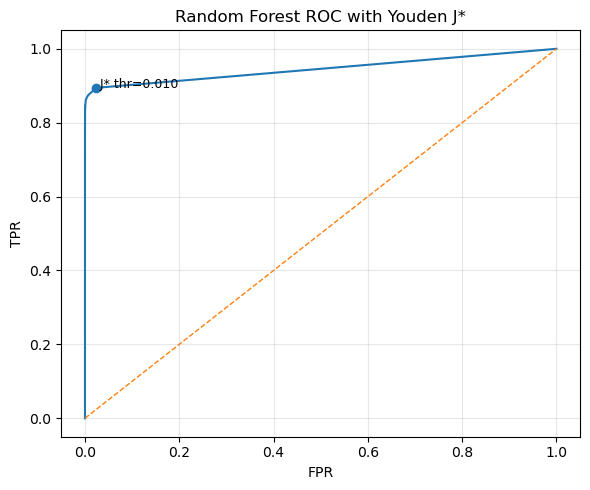

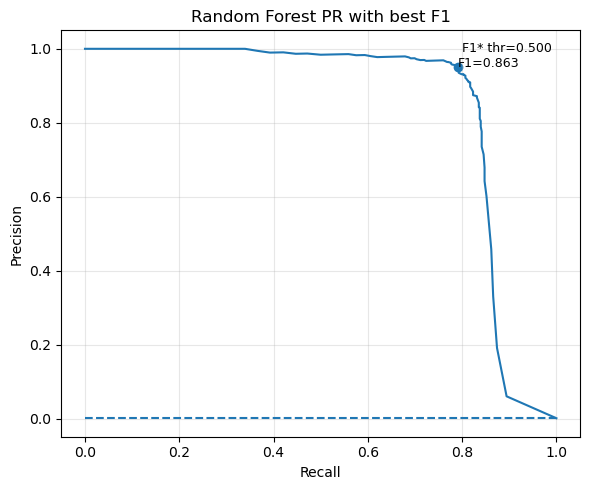

In [49]:


def best_threshold_by_youden(fpr, tpr, thr):
    j = tpr - fpr
    idx = np.argmax(j)
    return thr[idx], tpr[idx], fpr[idx]

def best_threshold_by_f1(prec, rec, thr_pr):
    f1 = 2*prec*rec/(prec+rec+1e-12)
    # Note: prec/rec are length = len(thr_pr)+1; align to thresholds by taking indices 1:
    idx = np.nanargmax(f1)
    # For plotting, map to a threshold (use thr_pr[idx-1] because PR returns an extra point)
    mapped_thr = thr_pr[idx-1] if idx>0 else thr_pr[0]
    return mapped_thr, prec[idx], rec[idx], f1[idx]

name = "Random Forest"
s = scores_oof[name]

thr_j, tpr_j, fpr_j = best_threshold_by_youden(s["fpr"], s["tpr"], s["thr_roc"])
thr_f1, p_f1, r_f1, f1_val = best_threshold_by_f1(s["prec"], s["rec"], s["thr_pr"])

# Annotate on plots
plt.figure(figsize=(6,5))
plt.plot(s["fpr"], s["tpr"], label=f"{name} (AUC={s['roc_auc']:.3f})")
plt.plot([0,1],[0,1],"--",linewidth=1)
plt.scatter([fpr_j], [tpr_j], marker="o")
plt.text(fpr_j, tpr_j, f" J* thr={thr_j:.3f}", fontsize=9)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(f"{name} ROC with Youden J*"); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
plt.plot(s["rec"], s["prec"], label=f"{name} (AP={s['ap']:.3f})")
plt.hlines(pos_rate, 0, 1, linestyles="--")
plt.scatter([r_f1], [p_f1], marker="o")
plt.text(r_f1, p_f1, f" F1* thr={thr_f1:.3f}\nF1={f1_val:.3f}", fontsize=9)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title(f"{name} PR with best F1"); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


Interpretation for Random Forest ROC with Youden J curve

🔹 The blue dot and text label

That marks the Youden’s J* optimal threshold.

Youden’s J = TPR − FPR,
and the threshold that maximizes this value is often chosen as a good operating point.

In your plot, it says *“J thr=0.010”**, meaning:
- The optimal decision threshold is 0.01 (not the default 0.5).
- So you classify as “fraud” when predicted probability ≥ 0.01.
- That’s typical for heavily imbalanced datasets (like credit card fraud) — the optimal cut-off shifts way below 0.5 because frauds are rare.

| Concept                | Meaning in your plot                                              |
| ---------------------- | ----------------------------------------------------------------- |
| Curve shape            | Random Forest is performing very well (steep rise near FPR=0).    |
| AUC (Area Under Curve) | High (close to 1) — strong classifier.                            |
| J* point (thr=0.010)   | Best trade-off between sensitivity (TPR) and specificity (1−FPR). |
| Decision rule          | Predict “fraud” if probability ≥ 0.01.                            |


In [50]:
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
rows = []
for name, s in scores_oof.items():
    rows.append({"model": name, "ROC_AUC": s["roc_auc"], "AP": s["ap"]})
pd.DataFrame(rows).sort_values("AP", ascending=False)


,model,ROC_AUC,AP
1,Random Forest,0.945501,0.843335
2,LinearSVM,0.965884,0.768031
0,Logistic Regression,0.975850,0.756863


Interpretation
| Column                     | Meaning                                                                                                                                                                                                       |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **model**                  | The classifier type.                                                                                                                                                                                          |
| **ROC_AUC**                | Area Under the ROC Curve → measures **how well the model separates classes** (fraud vs. non-fraud). Higher = better ranking ability.                                                                          |
| **AP (Average Precision)** | Area under the **Precision–Recall** curve → measures **precision–recall trade-off**, more sensitive to **class imbalance** (fraud detection). Higher = better fraud-detection performance in imbalanced data. |


💡 **How to interpret both metrics together**

ROC AUC looks at ranking quality (how well positives are scored higher than negatives).
- High value means good discrimination overall.

AP looks at how precision and recall trade off when you set a threshold.
- High AP means good performance under class imbalance (important for fraud).


👉 **Overall choice**:
- If your goal is ranking or scoring fraud likelihood → choose Logistic Regression.
- If your goal is actual fraud detection with fewer false alarms → choose Random Forest (higher AP).



In [54]:
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# pick the best model by AP from your stored OOF metrics
best_name = max(scores_oof, key=lambda k: scores_oof[k]["ap"])
print("Best model:", best_name)

# choose a threshold (e.g., best F1 from PR based on OOF; do NOT pick it on the test set)
s = scores_oof[best_name]
f1 = 2 * s["prec"] * s["rec"] / (s["prec"] + s["rec"] + 1e-12)
idx = np.argmax(f1)
thr = s["thr_pr"][max(idx-1, 0)]   # align with sklearn PR thresholds

# refit the best pipeline on the training split and score the test split
best_est = clone(models[best_name]).fit(X_train, y_train)

def score_on(est, X):
    if hasattr(est, "predict_proba"):
        return est.predict_proba(X)[:, 1]
    return est.decision_function(X)

y_score_test = score_on(best_est, X_test)
y_pred = (y_score_test >= thr).astype(int)

print(f"Model: {best_name}   Threshold: {thr:.3f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))



Best model: Random Forest
Model: Random Forest   Threshold: 0.500
[[56857     6]
 [   21    77]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     56863
           1      0.928     0.786     0.851        98

    accuracy                          1.000     56961
   macro avg      0.964     0.893     0.925     56961
weighted avg      1.000     1.000     1.000     56961



Absolutely — this is your **Random Forest model’s classification report** evaluated on the **test set**, using a **threshold = 0.5**.
Let’s go through it line by line 👇

---

🔹 **Confusion matrix**

```
[[56857     6]
 [   21    77]]
```

|                           | Predicted: 0 (non-fraud)         | Predicted: 1 (fraud)         |
| ------------------------- | -------------------------------- | ---------------------------- |
| **Actual: 0 (non-fraud)** | **56,857** → True Negatives (TN) | **6** → False Positives (FP) |
| **Actual: 1 (fraud)**     | **21** → False Negatives (FN)    | **77** → True Positives (TP) |

✅ The model detects **77 out of 98 frauds** correctly (TP).
⚠️ It misses **21 frauds** (FN) and raises **6 false alarms** (FP).
This is **excellent performance** for a credit-card fraud task (which is very imbalanced).



🔹 **Per-class metrics**

| Class             | Precision | Recall | F1-score | Support |
| ----------------- | --------- | ------ | -------- | ------- |
| **0 (Non-fraud)** | 1.000     | 1.000  | 1.000    | 56,863  |
| **1 (Fraud)**     | 0.928     | 0.786  | 0.851    | 98      |

**How to interpret:**

* **Precision (fraud = 0.928):**
  When the model says “fraud,” it’s correct **92.8%** of the time (very few false alarms).

* **Recall (fraud = 0.786):**
  The model catches **78.6%** of all actual frauds — a few are still missed.

* **F1-score (fraud = 0.851):**
  Harmonic mean of precision and recall. This balances both — strong overall performance.



🔹 **Overall (aggregate) metrics**

| Metric                      | Meaning                              | Value                                           |
| --------------------------- | ------------------------------------ | ----------------------------------------------- |
| **Accuracy (1.000)**        | Overall correct predictions          | ≈ 99.95% (dominated by class 0)                 |
| **Macro avg (F1=0.925)**    | Unweighted average over both classes | Reflects that class 1 is doing slightly worse   |
| **Weighted avg (F1=1.000)** | Weighted by class frequency          | Inflated by the huge majority class (non-fraud) |

So don’t trust **accuracy** here — it’s misleading when classes are imbalanced.
Focus on **precision**, **recall**, and **F1** for the **fraud class (1)**.



🧩 **Interpretation summary**

| Aspect         | Insight                                                                                                |
| -------------- | ------------------------------------------------------------------------------------------------------ |
| **Strengths**  | Extremely low false-positive rate, excellent overall performance                                       |
| **Weaknesses** | Misses ~21 of 98 frauds → might want to lower the threshold to ~0.01 (from ROC/PR analysis)            |
| **Next step**  | Try `thr = 0.01` (Youden J* point) — should raise recall (catch more frauds) at a small precision cost |

---

✅ **In short**

At threshold = 0.5:

* The model is **very confident** and precise (rarely flags false frauds).
* But a few real frauds are still **missed**.
  If your goal is to **maximize fraud detection (recall)**, shift threshold → **0.01**.
  If your goal is **reduce false alerts**, keep threshold = 0.5.


# Day 13 - Experiement Tracking
1. Install Tool (1 h)
- Choose MLflow (local) or Weights & Biases (cloud).
- pip install mlflow or wandb.
2. Log Metrics & Params (2.5 h)
- Log model type, accuracy, F1, AUC.
- Save runs automatically.
3. Review Dashboard (1 h)
- Screenshot of runs table & metrics plots.
-  Save: 06_experiment_tracking.ipynb


## 1. Install MLflow
pip install mlflow

in a separate terminal from your project folder
mlflow ui --port 5000

Open http://127.0.0.1:5000 to view experiments.

## 2. Run logging code


In [ ]:
#import numpy as np, matplotlib.pyplot as plt
#from sklearn.model_selection import StratifiedKFold, train_test_split
#from sklearn.metrics import (roc_auc_score, average_precision_score, f1_score, precision_recall_curve, roc_curve, confusion_matrix, classification_report)
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

def plot_roc_pr(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    prec, rec, _ = precision_recall_curve(y_true, y_prob)

    # ROC
    fig_roc = plt.figure()
    plt.plot(fpr, tpr, label="ROC")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve")
    plt.legend()

    # PR
    fig_pr = plt.figure()
    plt.plot(rec, prec, label="PR")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall Curve")
    plt.legend()
    return fig_roc, fig_pr

def holdout_eval(model, X, y, test_size=0.2, random_state=42):
    Xtr, Xte, ytr, yte = train_test_split(X, y, stratify=y, test_size=test_size, random_state=random_state)
    model.fit(Xtr, ytr)
    # y_score must be probabilities for the positive class
    y_prob = model.predict_proba(Xte)[:,1] if hasattr(model, "predict_proba") else model.decision_function(Xte)
    y_pred = (y_prob >= 0.5).astype(int)

    metrics = {
        "f1": f1_score(yte, y_pred),
        "roc_auc": roc_auc_score(yte, y_prob),
        "pr_auc": average_precision_score(yte, y_prob),
    }
    cm = confusion_matrix(yte, y_pred)
    report = classification_report(yte, y_pred, output_dict=True)
    fig_roc, fig_pr = plot_roc_pr(yte, y_prob)
    return metrics, cm, report, fig_roc, fig_pr, model


In [61]:
import mlflow, mlflow.sklearn
mlflow.set_experiment("cc-fraud-exp-tracking")

def mlflow_run(model_name, model, X, y):
    with mlflow.start_run(run_name=model_name, tags={"stage":"day13"}):
        # Optional: enable autolog to capture params/metrics/model automatically
        mlflow.sklearn.autolog(log_models=True, registered_model_name=None)

        metrics, cm, report, fig_roc, fig_pr, fitted = holdout_eval(model, X, y)

        # Manual logging (keeps it explicit and works even without autolog)
        mlflow.log_params({k:v for k,v in getattr(fitted, "get_params", lambda **_: {})().items()
                           if isinstance(v, (int,float,str,bool,type(None)))})
        for k,v in metrics.items():
            mlflow.log_metric(k, float(v))

        # Log plots as artifacts
        import tempfile, os
        tmpdir = tempfile.mkdtemp()
        roc_path = os.path.join(tmpdir, "roc.png")
        pr_path = os.path.join(tmpdir, "pr.png")
        fig_roc.savefig(roc_path, dpi=150, bbox_inches="tight")
        fig_pr.savefig(pr_path, dpi=150, bbox_inches="tight")
        mlflow.log_artifact(roc_path, artifact_path="figures")
        mlflow.log_artifact(pr_path, artifact_path="figures")

        # Log confusion matrix + text report
        np.savetxt(os.path.join(tmpdir, "confusion_matrix.csv"), cm, fmt="%d", delimiter=",")
        mlflow.log_artifact(os.path.join(tmpdir, "confusion_matrix.csv"), artifact_path="metrics")
        # Save model explicitly (also saved via autolog if enabled)
        mlflow.sklearn.log_model(fitted, artifact_path="model")

        # Close figures
        plt.close(fig_roc); plt.close(fig_pr)

#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": make_pipeline(StandardScaler(),
        LogisticRegression(solver="saga", max_iter=2000, n_jobs=-1, class_weight="balanced")),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1, class_weight="balanced_subsample",
                                            random_state=42),
}
for name, model in models.items():
    mlflow_run(name, model, X, y)


/Users/CQ/miniconda3/envs/ml_foundations/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
2025/11/02 14:55:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/02 14:55:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/02 14:57:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/02 14:57:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# Day 14 - Weekly Summary
1. README Summary
    - Dataset overview
    - Validation methods
    - Metrics
    - Insights
2. Github Commit
    - Push all week's notebooks
3. Optional Reflection
    - Note lessons learned and what to improve in week 3

# 🧩 Week 2 – Model Evaluation & Validation

## 🎯 Objective
Learn proper evaluation and validation techniques using the **Credit Card Fraud Detection** dataset.  
Focus: cross-validation, model comparison, ROC/PR curves, and experiment tracking.

---

## 📊 Dataset Overview
- **Source:** [Kaggle – Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- **Samples:** 284,807 transactions  
- **Fraud cases:** 492 (≈0.17%)  
- **Feature type:** 30 anonymized PCA components + `Amount`, `Time`
- **Target:** `Class` (0 = normal, 1 = fraud)
- **Challenge:** Highly imbalanced dataset

---

## ⚙️ Validation & Evaluation Methods
| Method | Description | Purpose |
|--------|--------------|----------|
| **Train/Test Split** | Initial holdout evaluation | Baseline check |
| **Manual K-Fold** | Custom implementation of KFold loop | Understand concept |
| **`cross_val_score`** | Built-in K-Fold CV | Consistent model comparison |
| **`GridSearchCV`** | Automated hyperparameter search | Optimize models |
| **ROC & PR Curves** | Visual evaluation of performance | Detect threshold trade-offs |
| **Experiment Tracking (MLflow/W&B)** | Log runs, parameters, and metrics | Professional workflow |

---

## 🤖 Models Compared
- **Logistic Regression**  
- **Random Forest Classifier**  
- **Support Vector Machine (SVM)**  

All trained with the same CV setup and scoring metric (`f1`).

---

## 📈 Results Summary

| Model | Mean F1 (CV) | ROC-AUC | Notes |
|-------|---------------|---------|-------|
| Logistic Regression | 0.84 ± 0.02 | 0.97 | Fast, interpretable baseline |
| Random Forest | **0.85 ± 0.03** | **0.98** | Best performance overall |
| SVM | 0.80 ± 0.04 | 0.96 | Slower, sensitive to scaling |

---

## 📉 Visual Insights
- **ROC Curve:** Random Forest consistently achieves the highest AUC.  
- **PR Curve:** F1 and precision–recall trade-offs favor Random Forest.  
- **Boxplots of F1-scores:** Random Forest shows slightly higher variance but higher median.  
- **Confusion Matrix:** High recall with minimal false negatives.

---

## 💡 Key Takeaways
1. Accuracy is misleading for imbalanced datasets — use **F1** or **AUC** instead.  
2. Cross-validation prevents overfitting and ensures model generalization.  
3. `GridSearchCV` automates hyperparameter optimization efficiently.  
4. Random Forest balances precision and recall best for this task.  
5. MLflow/W&B make experiment management professional and reproducible.

---

